In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [113]:
train = "IA3-train.csv"
dev = "IA3-dev.csv"

### Part 0: Preprocessing

In [114]:
def load_data(path, sentiment=None):
    df = pd.read_csv(path)
    y = df['sentiment']
    if sentiment != None:
        X = df[df['sentiment'] == sentiment]
    else:
        X = df
    return X["text"], y

##### Part 0(a) - Bag of words feature extraction

In [115]:
def extract_most_freq_words(bog, vect_inst, n):
    sum_cols = bog.sum(axis=0)
    words_freq = [(word, sum_cols[0, pos]) for word, pos in vect_inst.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    most_freq = words_freq[:n]
    return most_freq

###### positive sentiment

In [116]:
X_pos, y = load_data(train, sentiment=1)
coun_vect = CountVectorizer(lowercase=True)
bag_of_words_pos = coun_vect.fit_transform(X_pos)

print("The Top ten most frequent positive words using CountVectorizer are-->")
for item in extract_most_freq_words(bag_of_words_pos, coun_vect, 10):
    print(item[0], ":", item[1])

The Top ten most frequent positive words using CountVectorizer are-->
the : 746
you : 716
to : 716
for : 504
thanks : 462
jetblue : 455
southwestair : 452
united : 414
thank : 355
and : 330


###### negative sentiment

In [117]:
X_neg, y = load_data(train, sentiment=0)
coun_vect = CountVectorizer(lowercase=True)
bag_of_words_neg = coun_vect.fit_transform(X_neg)

print("The Top ten most frequent negative words using CountVectorizer are-->")
for item in extract_most_freq_words(bag_of_words_neg, coun_vect, 10):
    print(item[0], ":", item[1])

The Top ten most frequent negative words using CountVectorizer are-->
to : 4741
the : 3236
flight : 2313
united : 2254
on : 2202
and : 2191
you : 2130
for : 2104
my : 1926
usairways : 1885


##### Part 0(b) - TF-IDF feature extraction

In [118]:
def extract_mfw_tfidf(tfidf_mat, vect_inst, n):
    sum_cols = tfidf_mat.sum(axis=0)
    words_freq = [(word, sum_cols[0, pos]) for word, pos in vect_inst.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    most_freq = words_freq[:n]
    return most_freq

###### positive sentiment

In [119]:
X_pos, y = load_data(train, sentiment=1)
tfidf_vect = TfidfVectorizer(use_idf=True, lowercase=True)
tfidf_mat_pos = tfidf_vect.fit_transform(X_pos)

print("The Top ten most frequent positive words using TFIDF vectorizer-->")
for item in extract_mfw_tfidf(tfidf_mat_pos, tfidf_vect, 10):
    print(item[0], ":", item[1])

The Top ten most frequent positive words using TFIDF vectorizer-->
you : 110.87825510124587
thanks : 91.69079325308267
thank : 86.89812339864528
the : 81.97299862208087
jetblue : 81.19395636146685
united : 73.53405657485403
to : 73.41805852212777
southwestair : 72.43287660004934
for : 64.76012443299349
americanair : 60.99872365090127


###### negative sentiment

In [120]:
X_neg, y = load_data(train, sentiment=0)
tfidf_vect = TfidfVectorizer(use_idf=True, lowercase=True)
tfidf_mat_neg = tfidf_vect.fit_transform(X_neg)

print("The Top ten most frequent negative words using TFIDF vectorizer-->")
for item in extract_mfw_tfidf(tfidf_mat_neg, tfidf_vect, 10):
    print(item[0], ":", item[1])

The Top ten most frequent negative words using TFIDF vectorizer-->
to : 359.2906838073978
the : 295.37105839383537
flight : 241.58371560220323
you : 238.11512888455562
united : 237.01120827396764
on : 229.74896490472437
and : 222.17548084678558
for : 221.41670018189913
usairways : 214.98042505497082
my : 214.8651738529854


### Part 1: Linear SVM 

In [121]:
def linear_svm(c, bog, label):
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(bog, label)
    bog_array = bog.toarray()
    y_pred = clf.predict(bog_array)
    acc = accuracy_score(y_pred, label)
    print(f"Accuracy on the linear-svm train set with C value {c}: {acc:.4f}", "\t")
    return clf, acc

###### use the TF-IDF vectorizer on the train data to build your vocabulary

In [122]:
X_train, y_train = load_data(train)
tfidf_vect = TfidfVectorizer(use_idf=True, lowercase=True)
tfidf_mat_train = tfidf_vect.fit_transform(X_train)

###### get the text (X) and labels (y) of the validation data

In [123]:
X_dev, y_dev = load_data(dev)

###### convert the validation data into TF-IDF representations using the vocabulary (vectorizer) built with the trained data

In [124]:
trained_tfidf_vectorizer = tfidf_vect
X_test = trained_tfidf_vectorizer.transform(X_dev)

###### predict using the trained linear classifier and tune the values of the hyperparameter c

In [174]:
c = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
training_acc = []
validation_acc = []
n_support_vectors = []
for i in c:
    linear_clf, train_acc = linear_svm(pow(10, i), tfidf_mat_train, y_train)
    linear_ypred = linear_clf.predict(X_test)
    linear_acc = accuracy_score(linear_ypred, y_dev)
    training_acc.append(train_acc)
    validation_acc.append(linear_acc)
    n_support_vectors.append(sum(linear_clf.n_support_))
    print(f"Accuracy on the linear-svm test set with C value 10^{i}: {linear_acc:.4f}")
    print("---------------------------------------------")

Accuracy on the linear-svm train set with C value 0.0001: 0.7963 	
Accuracy on the linear-svm test set with C value 10^-4: 0.7904
---------------------------------------------
Accuracy on the linear-svm train set with C value 0.001: 0.7963 	
Accuracy on the linear-svm test set with C value 10^-3: 0.7904
---------------------------------------------
Accuracy on the linear-svm train set with C value 0.01: 0.7963 	
Accuracy on the linear-svm test set with C value 10^-2: 0.7908
---------------------------------------------
Accuracy on the linear-svm train set with C value 0.1: 0.8736 	
Accuracy on the linear-svm test set with C value 10^-1: 0.8692
---------------------------------------------
Accuracy on the linear-svm train set with C value 1: 0.9699 	
Accuracy on the linear-svm test set with C value 10^0: 0.9260
---------------------------------------------
Accuracy on the linear-svm train set with C value 10: 0.9981 	
Accuracy on the linear-svm test set with C value 10^1: 0.9120
-------

###### plot of the training and validation accuracy for linear svm

Plot of training versus validation accuracy...	
Done.



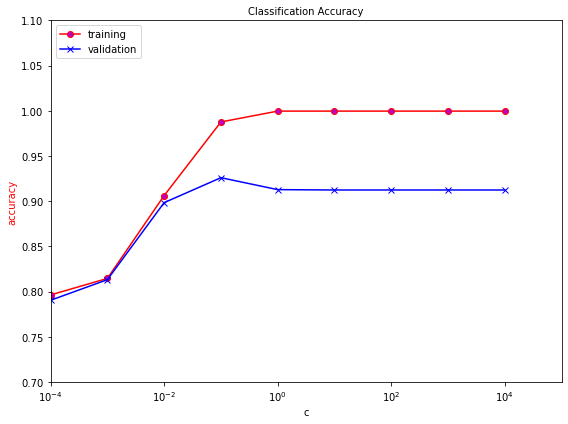

In [160]:
print('Plot of training versus validation accuracy...\t')

c = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
fig, ax3 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax3.semilogx(c, training_acc, color='r', marker='o', markerfacecolor='m')
ax3.semilogx(c, validation_acc, color='b', marker='x', markerfacecolor='r')

min_axis = min(min(training_acc), min(validation_acc))
max_axis = max(max(training_acc), max(validation_acc))

ax3.set_ylabel(f'accuracy', color='r')
ax3.set_xlabel(f'c')
ax3.set_xlim([1e-4, 1e5])
ax3.set_ylim(0.7, 1.1)
ax3.set_title(f"Classification Accuracy", color='k', weight='normal', size=10)
ax3.legend(["training", "validation"], loc="upper left")

plt.savefig("linear_train_dev_acc_cmp.jpg")
print('Done.\n')

###### plot of the number of support vectors versus the regularization parameters, c for linear svm

Plot of no of support vectors versus c...	


ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

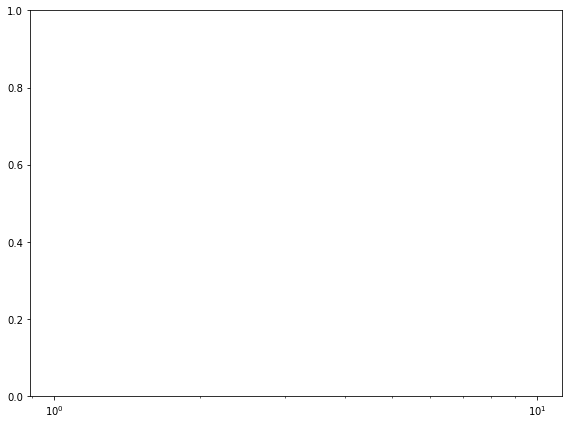

In [168]:
print('Plot of no of support vectors versus c...\t')

c = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
fig, ax4 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax4.semilogx(c, n_support_vectors, color='r', marker='o', markerfacecolor='m')

ax4.set_ylabel(f'no of support vectors', color='r')
ax4.set_xlabel(f'c')
ax4.set_xlim([1e-4, 1e4])
ax4.set_ylim(2300, 4000)
ax4.set_title(f"Number of support vectors", color='k', weight='normal', size=10)

plt.savefig("linear_support_vectors.jpg")
print('Done.\n')

### Part 2: Quadratic SVM 

In [175]:
def quadratic_svm(c, bog, label):
    clf = svm.SVC(kernel='poly', C=c, degree=2, coef0=10)
    clf.fit(bog, label)
    bog_array = bog.toarray()
    y_pred = clf.predict(bog_array)
    acc = accuracy_score(y_pred, label)
    print(f"Accuracy on the quadratic-svm train set with C value {c}: {acc:.4f}", "\t")
    return clf, acc

###### predict using the trained quadratic classifier and tune the values of the hyperparameter c

In [176]:
c = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
training_acc = []
validation_acc = []
n_support_vectors_quad = []
for i in c:
    quad_clf, train_acc = quadratic_svm(pow(10, i), tfidf_mat_train, y_train)
    quad_ypred = quad_clf.predict(X_test)
    quad_acc = accuracy_score(quad_ypred, y_dev)
    training_acc.append(train_acc)
    validation_acc.append(quad_acc)
    n_support_vectors_quad.append(sum(quad_clf.n_support_))
    print(f"Accuracy on the quadratic-svm test set with C value 10^{i}: {quad_acc:.4f}")
    print("---------------------------------------------")

Accuracy on the quadratic-svm train set with C value 0.0001: 0.7963 	
Accuracy on the quadratic-svm test set with C value 10^-4: 0.7904
---------------------------------------------
Accuracy on the quadratic-svm train set with C value 0.001: 0.8146 	
Accuracy on the quadratic-svm test set with C value 10^-3: 0.8132
---------------------------------------------
Accuracy on the quadratic-svm train set with C value 0.01: 0.9062 	
Accuracy on the quadratic-svm test set with C value 10^-2: 0.8984
---------------------------------------------
Accuracy on the quadratic-svm train set with C value 0.1: 0.9877 	
Accuracy on the quadratic-svm test set with C value 10^-1: 0.9260
---------------------------------------------
Accuracy on the quadratic-svm train set with C value 1: 0.9997 	
Accuracy on the quadratic-svm test set with C value 10^0: 0.9128
---------------------------------------------
Accuracy on the quadratic-svm train set with C value 10: 0.9997 	
Accuracy on the quadratic-svm test s

###### plot of the training and validation accuracy for quadratic svm

Plot of training versus validation accuracy...	
Done.



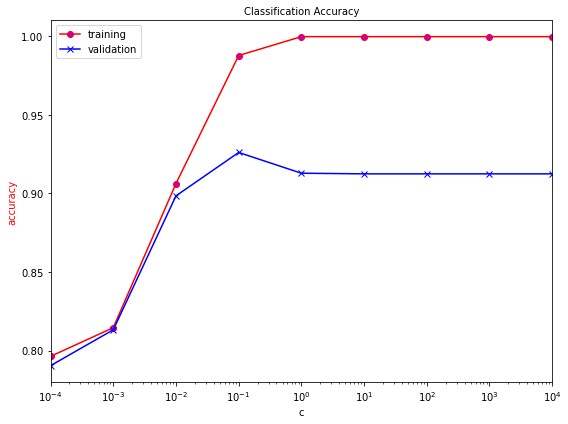

In [170]:
print('Plot of training versus validation accuracy...\t')

c = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
fig, ax3 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax3.semilogx(c, training_acc, color='r', marker='o', markerfacecolor='m')

ax3.semilogx(c, validation_acc, color='b', marker='x', markerfacecolor='r')

ax3.set_ylabel(f'accuracy', color='r')
ax3.set_xlabel(f'c')
ax3.set_xlim([1e-4, 1e4])
ax3.set_ylim(0.78, 1.01)
ax3.set_title(f"Classification Accuracy", color='k', weight='normal', size=10)
ax3.legend(["training", "validation"], loc="upper left")

plt.savefig("quad_train_dev_acc_cmp.jpg")
print('Done.\n')

###### plot of the number of support vectors versus the regularization parameters, c for quadratic svm

Plot of training versus validation accuracy...	
Done.



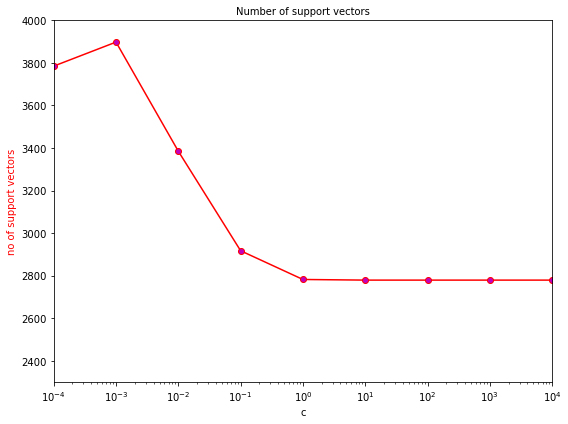

In [178]:
print('Plot of number of support vectors verus c...\t')

c = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
fig, ax4 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax4.semilogx(c, n_support_vectors_quad, color='r', marker='o', markerfacecolor='m')

ax4.set_ylabel(f'no of support vectors', color='r')
ax4.set_xlabel(f'c')
ax4.set_xlim([1e-4, 1e4])
ax4.set_ylim(2300, 4000)
ax4.set_title(f"Number of support vectors", color='k', weight='normal', size=10)

plt.savefig("quad_support_vectors.jpg")
print('Done.\n')

### Part 3: SVM with RBF kernel

In [206]:
def rbf_svm(c, bog, label, gamma_val='scale'):
    clf = svm.SVC(kernel='rbf', C=c, gamma=gamma_val)
    clf.fit(bog, label)
    bog_array = bog.toarray()
    y_pred = clf.predict(bog_array)
    acc = accuracy_score(y_pred, label)
    print(f"Accuracy on the rbf-svm train set with C value {c} and gamma value {gamma_val}: {acc:.4f}", "\t")
    return clf, acc

###### predict using the trained rbf classifier and tune the values of the hyperparameters c and \gamma

In [207]:
c = [10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e4]
gamma_values = [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1]
training_acc = []
validation_acc = []
n_support_vectors = []

for i in c:
    for gamma in gamma_values:
        rbf_clf, train_acc = rbf_svm(i, tfidf_mat_train, y_train, gamma)
        rbf_ypred = rbf_clf.predict(X_test)
        rbf_acc = accuracy_score(rbf_ypred, y_dev)
        training_acc.append(train_acc)
        validation_acc.append(rbf_acc)
        n_support_vectors.append(sum(rbf_clf.n_support_))
        print(f"Accuracy on the rbf-svm test set with C value {i} and gamma value {gamma}: {rbf_acc:.4f}")
        print("---------------------------------------------")

Accuracy on the rbf-svm train set with C value 0.001 and gamma value 0.0001: 0.7963 	
Accuracy on the rbf-svm test set with C value 0.001 and gamma value 0.0001: 0.7904
---------------------------------------------
Accuracy on the rbf-svm train set with C value 0.001 and gamma value 0.001: 0.7963 	
Accuracy on the rbf-svm test set with C value 0.001 and gamma value 0.001: 0.7904
---------------------------------------------
Accuracy on the rbf-svm train set with C value 0.001 and gamma value 0.01: 0.7963 	
Accuracy on the rbf-svm test set with C value 0.001 and gamma value 0.01: 0.7904
---------------------------------------------
Accuracy on the rbf-svm train set with C value 0.001 and gamma value 0.1: 0.7963 	
Accuracy on the rbf-svm test set with C value 0.001 and gamma value 0.1: 0.7904
---------------------------------------------
Accuracy on the rbf-svm train set with C value 0.001 and gamma value 1.0: 0.7963 	
Accuracy on the rbf-svm test set with C value 0.001 and gamma value 1

Accuracy on the rbf-svm test set with C value 100.0 and gamma value 1.0: 0.9252
---------------------------------------------
Accuracy on the rbf-svm train set with C value 100.0 and gamma value 10.0: 0.9997 	
Accuracy on the rbf-svm test set with C value 100.0 and gamma value 10.0: 0.8052
---------------------------------------------
Accuracy on the rbf-svm train set with C value 100.0 and gamma value 100.0: 0.9997 	
Accuracy on the rbf-svm test set with C value 100.0 and gamma value 100.0: 0.8040
---------------------------------------------
Accuracy on the rbf-svm train set with C value 1000.0 and gamma value 0.0001: 0.9046 	
Accuracy on the rbf-svm test set with C value 1000.0 and gamma value 0.0001: 0.8964
---------------------------------------------
Accuracy on the rbf-svm train set with C value 1000.0 and gamma value 0.001: 0.9858 	
Accuracy on the rbf-svm test set with C value 1000.0 and gamma value 0.001: 0.9252
---------------------------------------------
Accuracy on the rb

In [208]:
training_accuracy = np.array(training_acc)
training_accuracy = np.reshape(training_accuracy, (len(c), len(gamma_values)))
validation_accuracy = np.array(validation_acc)
validation_accuracy = np.reshape(validation_accuracy, (len(c), len(gamma_values)))

###### plot of the training and validation accuracy for rbf svm

In [209]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

Done.



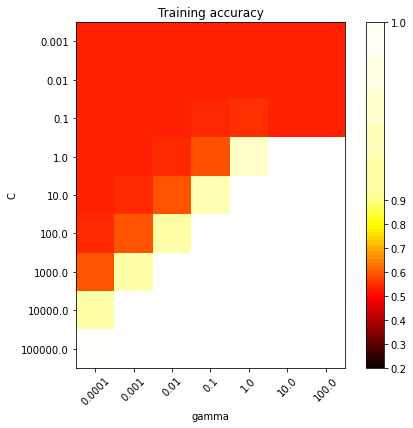

In [210]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    training_accuracy,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_values)), gamma_values, rotation=45)
plt.yticks(np.arange(len(c)), c)
plt.title("Training accuracy")
plt.savefig("training_acc_rbf.jpg")
print('Done.\n')
plt.show()

Done.



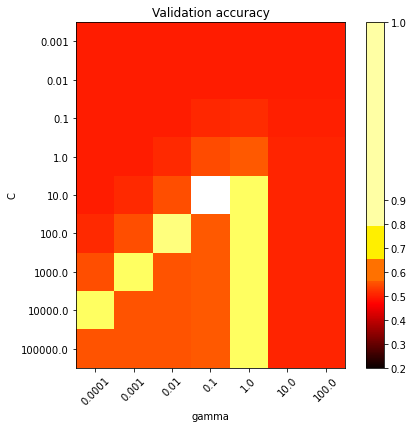

In [211]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    validation_accuracy,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_values)), gamma_values, rotation=45)
plt.yticks(np.arange(len(c)), c)
plt.title("Validation accuracy")
plt.savefig("validation_acc_rbf.jpg")
print('Done.\n')
plt.show()

###### plot of the number of support vectors versus the regularization parameters, c for rbf kernel svm

Accuracy on the rbf-svm train set with C value 0.001 and gamma value 0.1: 0.7963 	
Accuracy on the rbf-svm train set with C value 0.01 and gamma value 0.1: 0.7963 	
Accuracy on the rbf-svm train set with C value 0.1 and gamma value 0.1: 0.8102 	
Accuracy on the rbf-svm train set with C value 1.0 and gamma value 0.1: 0.8981 	
Accuracy on the rbf-svm train set with C value 10.0 and gamma value 0.1: 0.9876 	
Accuracy on the rbf-svm train set with C value 100.0 and gamma value 0.1: 0.9997 	
Accuracy on the rbf-svm train set with C value 1000.0 and gamma value 0.1: 0.9997 	
Accuracy on the rbf-svm train set with C value 10000.0 and gamma value 0.1: 0.9997 	
Accuracy on the rbf-svm train set with C value 100000.0 and gamma value 0.1: 0.9997 	
Done.



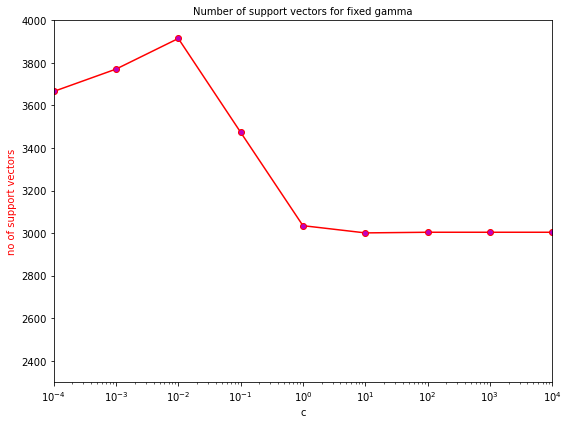

In [212]:
c = [10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e4]
n_support_vectors_rbf = []

for i in c:
    rbf_clf, train_acc = rbf_svm(i, tfidf_mat_train, y_train, 0.1)
    rbf_ypred = rbf_clf.predict(X_test)
    rbf_acc = accuracy_score(rbf_ypred, y_dev)
    n_support_vectors_rbf.append(sum(rbf_clf.n_support_))
        
c = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
fig, ax4 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax4.semilogx(c, n_support_vectors_rbf, color='r', marker='o', markerfacecolor='m')

ax4.set_ylabel(f'no of support vectors', color='r')
ax4.set_xlabel(f'c')
ax4.set_xlim([1e-4, 1e4])
ax4.set_ylim(2300, 4000)
ax4.set_title(f"Number of support vectors for fixed gamma", color='k', weight='normal', size=10)

plt.savefig("rbf_svs_fixedlambda.jpg")
print('Done.\n')

Accuracy on the rbf-svm train set with C value 10 and gamma value 0.0001: 0.7963 	
Accuracy on the rbf-svm train set with C value 10 and gamma value 0.001: 0.8143 	
Accuracy on the rbf-svm train set with C value 10 and gamma value 0.01: 0.9041 	
Accuracy on the rbf-svm train set with C value 10 and gamma value 0.1: 0.9876 	
Accuracy on the rbf-svm train set with C value 10 and gamma value 1.0: 0.9997 	
Accuracy on the rbf-svm train set with C value 10 and gamma value 10.0: 0.9997 	
Accuracy on the rbf-svm train set with C value 10 and gamma value 100.0: 0.9997 	
Done.



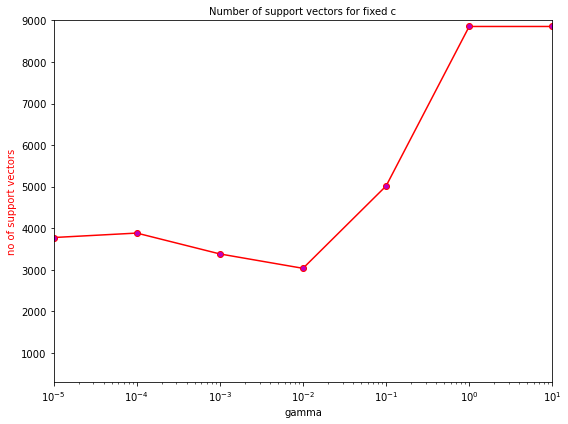

In [199]:
c = [10e0]
gamma_values = [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1]
n_support_vectors_rbf2 = []

for gamma in gamma_values:
    rbf_clf, train_acc = rbf_svm(10, tfidf_mat_train, y_train, gamma)
    rbf_ypred = rbf_clf.predict(X_test)
    rbf_acc = accuracy_score(rbf_ypred, y_dev)
    n_support_vectors_rbf2.append(sum(rbf_clf.n_support_))
        
ga = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
fig, ax4 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax4.semilogx(ga, n_support_vectors_rbf2, color='r', marker='o', markerfacecolor='m')

ax4.set_ylabel(f'no of support vectors', color='r')
ax4.set_xlabel(f'gamma')
ax4.set_xlim([1e-5, 1e1])
ax4.set_ylim(300, 9000)
ax4.set_title(f"Number of support vectors for fixed c", color='k', weight='normal', size=10)

plt.savefig("rbf_svs_fixedc.jpg")
print('Done.\n')

In [203]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea